Judul Laporan: Perbandingan Algoritma Klasifikasi pada Dataset Tipe Beras

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
from sklearn.neighbors import (NeighborhoodComponentsAnalysis, KNeighborsClassifier)
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


In [ ]:
dataset = pd.read_csv('riceDataset.csv')
dataset.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


In [ ]:
dataset.shape

(3810, 8)

In [ ]:
dropped_column = ['Class']

features = dataset.drop(dropped_column, axis=1)
features.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024


In [ ]:
dropped_column = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea','Extent']

true_class = dataset.drop(dropped_column, axis=1)
true_class.head()

,Class
0,Cammeo
1,Cammeo
2,Cammeo
3,Cammeo
4,Cammeo


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, true_class, test_size=0.2, random_state=42)

In [ ]:
X_train

,Area,Perimeter,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent
3644,12529,437.838989,174.861450,92.189262,0.849733,12840,0.766019
3418,11051,424.976013,180.871902,78.267380,0.901527,11240,0.568058
1351,12975,463.851013,196.423965,85.064117,0.901363,13358,0.609126
3591,10398,405.678986,162.227158,82.393456,0.861422,10658,0.644717
246,14541,492.785004,204.257141,92.471016,0.891653,14893,0.758292
...,...,...,...,...,...,...,...
1130,16625,535.989014,229.793594,93.089622,0.914272,16951,0.654141
1294,13901,478.848999,200.441910,89.341988,0.895170,14232,0.568548
860,16291,523.192993,223.252335,93.604156,0.907859,16595,0.581157
3507,10847,417.924011,170.366791,82.473007,0.875018,11107,0.746319


In [ ]:
y_train

,Class
3644,Osmancik
3418,Osmancik
1351,Cammeo
3591,Osmancik
246,Cammeo
...,...
1130,Cammeo
1294,Cammeo
860,Cammeo
3507,Osmancik


In [ ]:
X_test

,Area,Perimeter,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent
1011,12442,459.535004,187.508850,87.187302,0.885323,12941,0.587580
3185,12408,437.014008,179.741165,88.829605,0.869343,12598,0.636928
3698,12867,449.079987,181.700562,91.341064,0.864460,13152,0.649062
897,13090,472.945007,202.601578,83.230179,0.911722,13331,0.775290
3245,10359,409.510986,173.337967,76.875809,0.896273,10510,0.573588
...,...,...,...,...,...,...,...
1366,14802,497.832001,209.617950,91.147133,0.900515,15208,0.622980
644,17192,528.341980,222.949936,99.092674,0.895798,17457,0.628914
2634,11234,425.931000,176.301987,82.101532,0.884950,11452,0.655579
1171,13982,479.785004,204.542389,88.279648,0.902067,14221,0.772913


In [ ]:
y_test

,Class
1011,Cammeo
3185,Osmancik
3698,Osmancik
897,Cammeo
3245,Osmancik
...,...
1366,Cammeo
644,Cammeo
2634,Osmancik
1171,Cammeo


**Algoritma KNN**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn_model = knn.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
kelas_prediksi = knn_model.predict(X_test)
kelas_prediksi

array(['Osmancik', 'Osmancik', 'Osmancik', 'Osmancik', 'Osmancik',
       'Cammeo', 'Osmancik', 'Cammeo', 'Cammeo', 'Osmancik', 'Osmancik',
       'Cammeo', 'Cammeo', 'Osmancik', 'Cammeo', 'Cammeo', 'Osmancik',
       'Osmancik', 'Osmancik', 'Cammeo', 'Osmancik', 'Cammeo', 'Osmancik',
       'Osmancik', 'Cammeo', 'Osmancik', 'Osmancik', 'Osmancik', 'Cammeo',
       'Osmancik', 'Osmancik', 'Osmancik', 'Osmancik', 'Cammeo',
       'Osmancik', 'Osmancik', 'Osmancik', 'Cammeo', 'Cammeo', 'Cammeo',
       'Cammeo', 'Cammeo', 'Osmancik', 'Osmancik', 'Cammeo', 'Osmancik',
       'Osmancik', 'Osmancik', 'Osmancik', 'Osmancik', 'Osmancik',
       'Osmancik', 'Osmancik', 'Cammeo', 'Osmancik', 'Cammeo', 'Osmancik',
       'Cammeo', 'Osmancik', 'Osmancik', 'Osmancik', 'Osmancik',
       'Osmancik', 'Osmancik', 'Cammeo', 'Cammeo', 'Osmancik', 'Osmancik',
       'Osmancik', 'Cammeo', 'Cammeo', 'Cammeo', 'Cammeo', 'Osmancik',
       'Osmancik', 'Osmancik', 'Cammeo', 'Osmancik', 'Osmancik', 'Cammeo',


In [ ]:
nama_kelas = y_test['Class'].unique().tolist()
nama_kelas

['Cammeo', 'Osmancik']

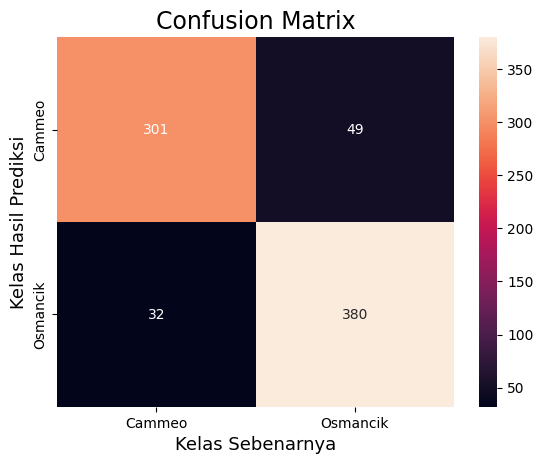

In [ ]:
cm = confusion_matrix(y_test, kelas_prediksi)
sns.heatmap(cm, annot=True,
            fmt='g',
            xticklabels = nama_kelas,
            yticklabels = nama_kelas)
plt.ylabel('Kelas Hasil Prediksi', fontsize=13)
plt.xlabel('Kelas Sebenarnya', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

In [ ]:
print(classification_report(y_test, kelas_prediksi))

              precision    recall  f1-score   support

      Cammeo       0.90      0.86      0.88       350
    Osmancik       0.89      0.92      0.90       412

    accuracy                           0.89       762
   macro avg       0.89      0.89      0.89       762
weighted avg       0.89      0.89      0.89       762



**Algoritma Artificial Neural Network**

In [ ]:
clf = MLPClassifier(random_state=42, max_iter=100).fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(max_iter=100, random_state=42)

In [ ]:
y_predict_ann = clf.predict(X_test)
y_predict_ann

array(['Cammeo', 'Osmancik', 'Osmancik', 'Osmancik', 'Osmancik', 'Cammeo',
       'Osmancik', 'Cammeo', 'Cammeo', 'Osmancik', 'Osmancik', 'Cammeo',
       'Cammeo', 'Osmancik', 'Osmancik', 'Cammeo', 'Osmancik', 'Osmancik',
       'Osmancik', 'Cammeo', 'Cammeo', 'Cammeo', 'Osmancik', 'Osmancik',
       'Cammeo', 'Osmancik', 'Osmancik', 'Osmancik', 'Osmancik',
       'Osmancik', 'Cammeo', 'Osmancik', 'Osmancik', 'Cammeo', 'Osmancik',
       'Osmancik', 'Osmancik', 'Osmancik', 'Cammeo', 'Osmancik', 'Cammeo',
       'Cammeo', 'Osmancik', 'Osmancik', 'Cammeo', 'Osmancik', 'Osmancik',
       'Osmancik', 'Osmancik', 'Osmancik', 'Osmancik', 'Osmancik',
       'Cammeo', 'Osmancik', 'Cammeo', 'Cammeo', 'Osmancik', 'Cammeo',
       'Cammeo', 'Osmancik', 'Osmancik', 'Osmancik', 'Osmancik',
       'Osmancik', 'Cammeo', 'Osmancik', 'Osmancik', 'Osmancik',
       'Osmancik', 'Cammeo', 'Cammeo', 'Cammeo', 'Cammeo', 'Osmancik',
       'Osmancik', 'Osmancik', 'Cammeo', 'Osmancik', 'Osmancik', 'Cammeo',


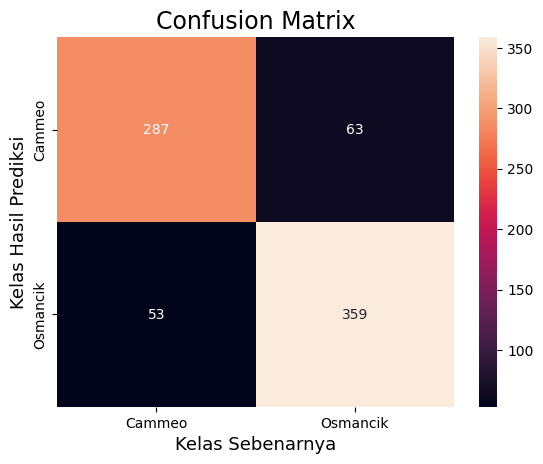

In [ ]:
cm = confusion_matrix(y_test, y_predict_ann)
sns.heatmap(cm, annot=True,
            fmt='g',
            xticklabels = nama_kelas,
            yticklabels = nama_kelas)
plt.ylabel('Kelas Hasil Prediksi', fontsize=13)
plt.xlabel('Kelas Sebenarnya', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

In [ ]:
print(classification_report(y_test, y_predict_ann))

              precision    recall  f1-score   support

      Cammeo       0.84      0.82      0.83       350
    Osmancik       0.85      0.87      0.86       412

    accuracy                           0.85       762
   macro avg       0.85      0.85      0.85       762
weighted avg       0.85      0.85      0.85       762



**Algoritma SVM**

In [ ]:
#default hyperparameters

svc=SVC()
svc.fit(X_train, y_train)
y_pred_svm_default=svc.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


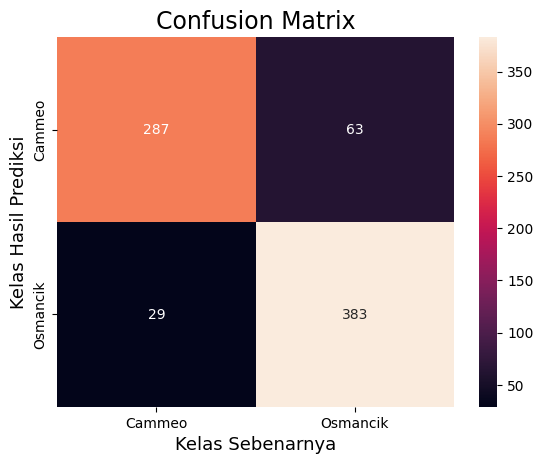

In [ ]:
cm = confusion_matrix(y_test, y_pred_svm_default)
sns.heatmap(cm, annot=True,
            fmt='g',
            xticklabels = nama_kelas,
            yticklabels = nama_kelas)
plt.ylabel('Kelas Hasil Prediksi', fontsize=13)
plt.xlabel('Kelas Sebenarnya', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_svm_default))

              precision    recall  f1-score   support

      Cammeo       0.91      0.82      0.86       350
    Osmancik       0.86      0.93      0.89       412

    accuracy                           0.88       762
   macro avg       0.88      0.87      0.88       762
weighted avg       0.88      0.88      0.88       762



In [ ]:
# linear kernel

linear_svc=SVC(kernel='linear', C=1.0)

linear_svc.fit(X_train, y_train)

y_pred_svm_linear = linear_svc.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


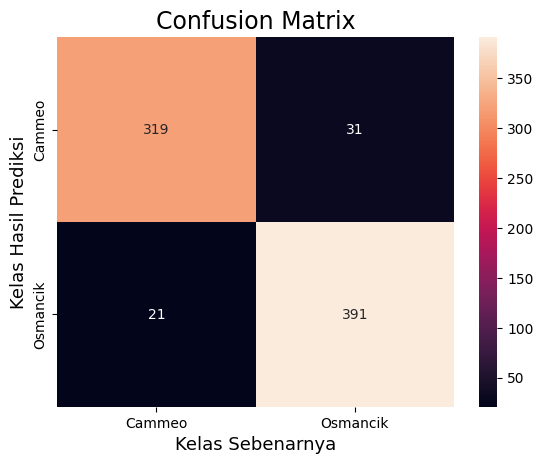

In [ ]:
cm = confusion_matrix(y_test, y_pred_svm_linear)
sns.heatmap(cm, annot=True,
            fmt='g',
            xticklabels = nama_kelas,
            yticklabels = nama_kelas)
plt.ylabel('Kelas Hasil Prediksi', fontsize=13)
plt.xlabel('Kelas Sebenarnya', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_svm_linear))

              precision    recall  f1-score   support

      Cammeo       0.94      0.91      0.92       350
    Osmancik       0.93      0.95      0.94       412

    accuracy                           0.93       762
   macro avg       0.93      0.93      0.93       762
weighted avg       0.93      0.93      0.93       762



In [ ]:
# rbf kernel
svc_rbf = SVC(C=100)
svc_rbf.fit(X_train, y_train)
y_pred_svm_rbf= svc.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


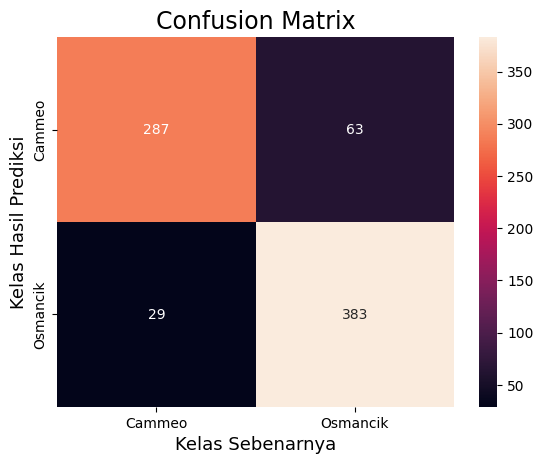

In [ ]:
cm = confusion_matrix(y_test, y_pred_svm_rbf)
sns.heatmap(cm, annot=True,
            fmt='g',
            xticklabels = nama_kelas,
            yticklabels = nama_kelas)
plt.ylabel('Kelas Hasil Prediksi', fontsize=13)
plt.xlabel('Kelas Sebenarnya', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_svm_rbf))

              precision    recall  f1-score   support

      Cammeo       0.91      0.82      0.86       350
    Osmancik       0.86      0.93      0.89       412

    accuracy                           0.88       762
   macro avg       0.88      0.87      0.88       762
weighted avg       0.88      0.88      0.88       762



In [ ]:
# poly kernel

poly_svc=SVC(kernel='poly', C=1.0)

poly_svc.fit(X_train, y_train)

y_pred_svm_poly = poly_svc.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


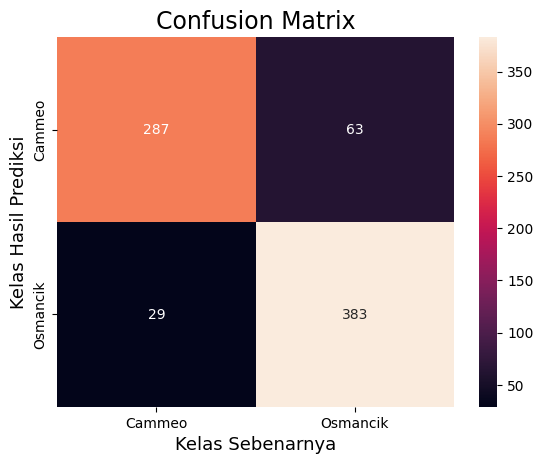

In [ ]:
cm = confusion_matrix(y_test, y_pred_svm_poly)
sns.heatmap(cm, annot=True,
            fmt='g',
            xticklabels = nama_kelas,
            yticklabels = nama_kelas)
plt.ylabel('Kelas Hasil Prediksi', fontsize=13)
plt.xlabel('Kelas Sebenarnya', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_svm_poly))

              precision    recall  f1-score   support

      Cammeo       0.91      0.82      0.86       350
    Osmancik       0.86      0.93      0.89       412

    accuracy                           0.88       762
   macro avg       0.88      0.87      0.88       762
weighted avg       0.88      0.88      0.88       762



**Algoritma Decision Tree**

In [ ]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [ ]:
dataset['Class'].value_counts()

Class
Osmancik    2180
Cammeo      1630
Name: count, dtype: int64

In [ ]:
y_pred_tree = clf_en.predict(X_test)

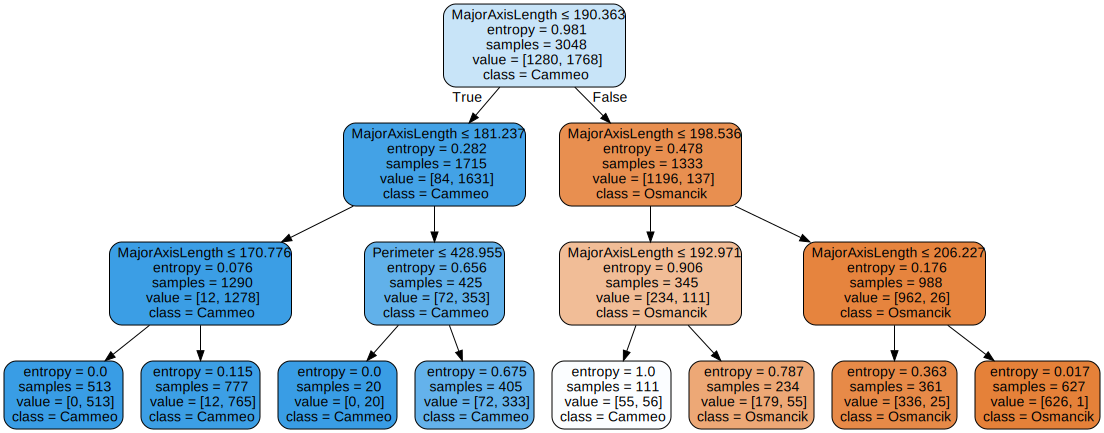

In [ ]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(clf_en, out_file=None, feature_names=X_train.columns,
                                class_names=['Osmancik', 'Cammeo'], filled=True, rounded=True,
                                special_characters=True)

graph = graphviz.Source(dot_data)

graph

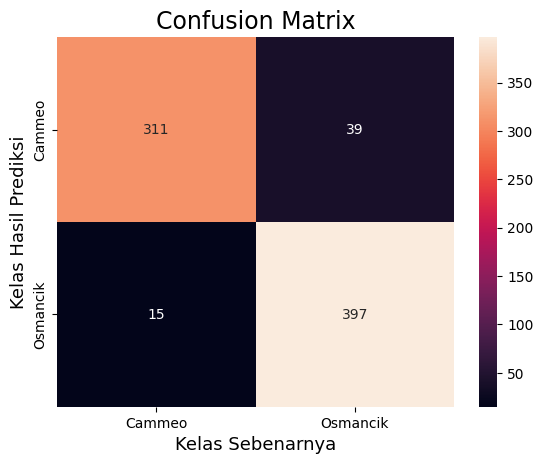

In [ ]:
cm = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm, annot=True,
            fmt='g',
            xticklabels = nama_kelas,
            yticklabels = nama_kelas)
plt.ylabel('Kelas Hasil Prediksi', fontsize=13)
plt.xlabel('Kelas Sebenarnya', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

      Cammeo       0.95      0.89      0.92       350
    Osmancik       0.91      0.96      0.94       412

    accuracy                           0.93       762
   macro avg       0.93      0.93      0.93       762
weighted avg       0.93      0.93      0.93       762

